In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from sklearn.linear_model import LinearRegression
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

from wave_solvers import num_step, ml_step, make_matrix
from train_ml import train_ml

# Functions which we can use

In [20]:
# define functions to use
def f_gauss(x, t=0):
    func = np.exp(10*np.sin(np.pi * (x-t))**2) - 1
    return func / np.max(func)

def f_cos(x, t=0):
    func = np.cos(2*np.pi * (x-t))
    return func / np.max(func)

# Train ML model
First define parameters

In [43]:
# Define training parameters
dt = 0.002
nsteps = 50
rollout = 10 # number of time steps forward to use in training
dx = 0.01
nx = int(1/dx + 1)
stencil = 3 # stencil width (upwind)
x = np.arange(0, 1+dx/2, dx)

# Define the function
f = f_gauss

# train the model
params = train_ml(dt, dx, nsteps, rollout, stencil, f, print_mes=True)

Success! Learned params: [ 0.73706665  0.3274086  -0.0643265 ]
Numerical a, b: 0.8 0.2


# Compare model results after dt*nsteps time

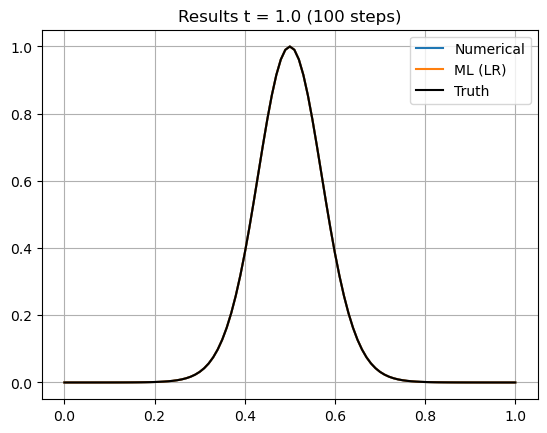

In [37]:
num_steps_test = 100
ml_result = ml_step(f(x), num_steps_test, params, stencil, all_steps=False)
num_result = num_step(f(x), dt, num_steps_test, all_steps=False)
data_result = f(x, dt*num_steps_test)

plt.plot(x, num_result, label='Numerical')
plt.plot(x, ml_result, label='ML (LR)')
plt.plot(x, data_result, c='black', label='Truth')
plt.title(f'Results t = {dt*num_steps_test} ({num_steps_test} steps)')
plt.legend()
plt.grid()

# Plot MSE with Time

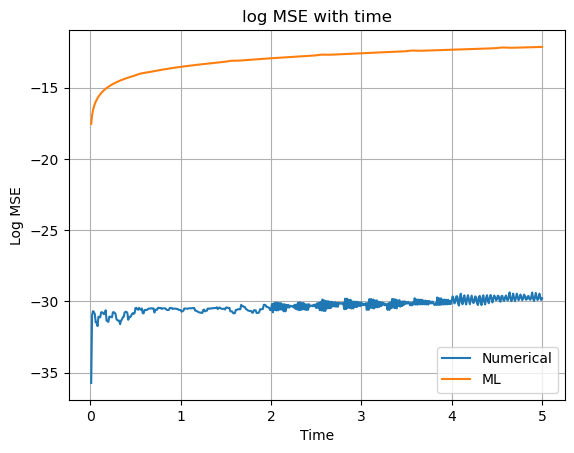

In [38]:
num_steps_test = int(5/dt)
ml_result = ml_step(f(x), num_steps_test, params, stencil)
num_result = num_step(f(x), dt, num_steps_test)
t = np.arange(0,dt*num_steps_test+dt/2,dt)
X, T = np.meshgrid(x, t, indexing='ij')
data_result = f(X, T)

plt.plot(t, np.log10(np.mean((num_result-data_result)**2, axis=0)), label='Numerical')
plt.plot(t, np.log10(np.mean((ml_result-data_result)**2, axis=0)), label='ML')
plt.title(f'log MSE with time')
plt.xlabel("Time")
plt.ylabel("Log MSE")
plt.legend()
plt.grid()

# Animate Evolution of System

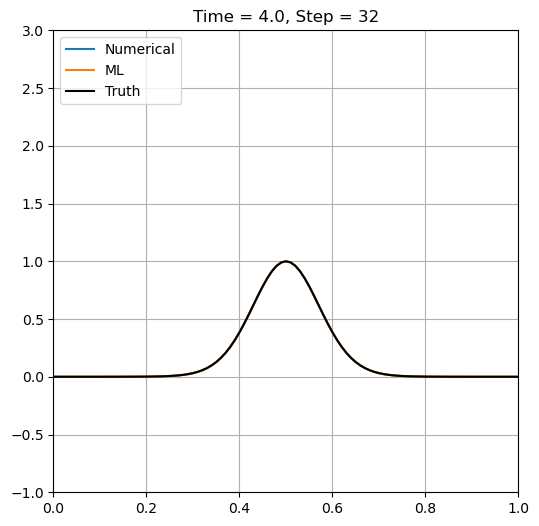

In [39]:
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(6,6))

# Plot the initial frame. 
line1, = ax.plot(x, num_result[:,0], label='Numerical')
line2, = ax.plot(x, ml_result[:,0], label='ML')
line3, = ax.plot(x, data_result[:,0], label='Truth', c='black')
ax.legend(loc='upper left')
ax.set_ylim([-1,3])
ax.grid()
ax.set_xlim([0,1])

skip=50

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    line1.set_data(x, num_result[:,frame*skip])
    line2.set_data(x, ml_result[:,frame*skip])
    line3.set_data(x, data_result[:,frame*skip])
    ax.set_title("Time = " + str(np.round(dt*frame*skip, 4)) + f", Step = {frame*4}")


# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=(len(num_result[0])-skip)//skip,       # Could also be iterable or list
    interval=dt*1000*skip     # ms between frames
)

HTML(ani.to_jshtml())